In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import load_iris

In [3]:
data = load_iris()


In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [16]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [19]:
X = df.drop('target', axis=1)
y = df.target

In [39]:
model_random = RandomForestClassifier(n_estimators=10)

In [40]:
# train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2)

In [41]:
# model training 
model_random.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [42]:
model_random.score(X_test, y_test)

0.9666666666666667

In [43]:
y_pred = model_random.predict(X_test)

In [33]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 1, 1, 2, 1, 1])

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [45]:
cm

array([[13,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  7]])

Text(58.222222222222214, 0.5, 'Truth')

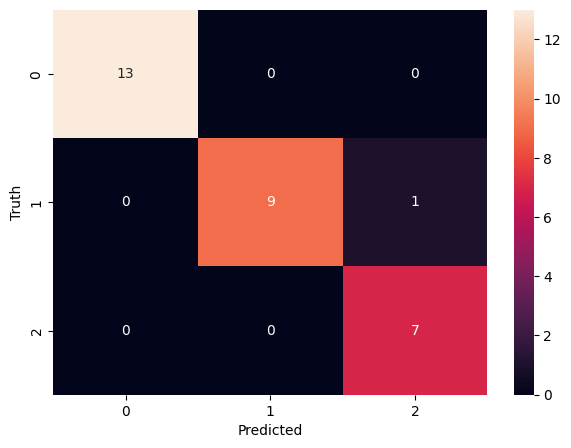

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')